In [103]:
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy
import glob
from scipy.stats.mstats import linregress

In [104]:
# reading all data files into a single xarray

files=sorted(glob.glob('CERES_FluxByCldTyp_*.nc'))
DS=xr.open_mfdataset(files,combine='nested',concat_dim='time')

In [105]:
lat=DS.lat
lon=DS.lon
time=DS.time

In [106]:
# applying the area weightage

wt = np.cos(np.tile(abs(lat.values[:,None])*np.pi/180,(1,len(lon))))
ds=DS*wt

In [107]:
# replacing nan values by 0

ds=ds.fillna(0)

In [168]:
ds

<xarray.Dataset>
Dimensions:                 (lat: 180, lon: 360, opt: 6, press: 7, time: 210)
Coordinates:
  * lat                     (lat) float32 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * opt                     (opt) float32 0.0 1.0 2.0 3.0 4.0 5.0
  * lon                     (lon) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * press                   (press) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0
  * time                    (time) datetime64[ns] 2002-07-15 ... 2019-12-15
Data variables:
    cldarea_total_mon       (time, lat, lon) float32 dask.array<chunksize=(15, 180, 360), meta=np.ndarray>
    cldarea_liq_total_mon   (time, lat, lon) float32 dask.array<chunksize=(15, 180, 360), meta=np.ndarray>
    cldarea_ice_total_mon   (time, lat, lon) float32 dask.array<chunksize=(15, 180, 360), meta=np.ndarray>
    cldpress_total_mon      (time, lat, lon) float32 dask.array<chunksize=(15, 180, 360), meta=np.ndarray>
    cldtemp_total_mon       (time, lat, lon) float32 dask.array<chunksize=(15, 180, 360), meta=np.ndarray>
    cldicerad_total_mon     (time, lat, lon) float32 dask.array<chunksize=(15, 180, 360), meta=np.ndarray>
    cldemissir_total_mon    (time, lat, lon) float32 dask.array<chunksize=(15, 180, 360), meta=np.ndarray>
    iwp_total_mon           (time, lat, lon) float32 dask.array<chunksize=(15, 180, 360), meta=np.ndarray>
    cldwatrad_total_mon     (time, lat, lon) float32 dask.array<chunksize=(15, 180, 360), meta=np.ndarray>
    lwp_total_mon           (time, lat, lon) float32 dask.array<chunksize=(15, 180, 360), meta=np.ndarray>
    cldtau_total_mon        (time, lat, lon) float32 dask.array<chunksize=(15, 180, 360), meta=np.ndarray>
    cldarea_cldtyp_mon      (opt, press, time, lat, lon) float32 dask.array<chunksize=(6, 7, 15, 180, 360), meta=np.ndarray>
    cldarea_liq_cldtyp_mon  (opt, press, time, lat, lon) float32 dask.array<chunksize=(6, 7, 15, 180, 360), meta=np.ndarray>
    cldarea_ice_cldtyp_mon  (opt, press, time, lat, lon) float32 dask.array<chunksize=(6, 7, 15, 180, 360), meta=np.ndarray>
    cldpress_cldtyp_mon     (opt, press, time, lat, lon) float32 dask.array<chunksize=(6, 7, 15, 180, 360), meta=np.ndarray>
    cldtemp_cldtyp_mon      (opt, press, time, lat, lon) float32 dask.array<chunksize=(6, 7, 15, 180, 360), meta=np.ndarray>
    cldemissir_cldtyp_mon   (opt, press, time, lat, lon) float32 dask.array<chunksize=(6, 7, 15, 180, 360), meta=np.ndarray>
    cldicerad_cldtyp_mon    (opt, press, time, lat, lon) float32 dask.array<chunksize=(6, 7, 15, 180, 360), meta=np.ndarray>
    iwp_cldtyp_mon          (opt, press, time, lat, lon) float32 dask.array<chunksize=(6, 7, 15, 180, 360), meta=np.ndarray>
    cldwatrad_cldtyp_mon    (opt, press, time, lat, lon) float32 dask.array<chunksize=(6, 7, 15, 180, 360), meta=np.ndarray>
    lwp_cldtyp_mon          (opt, press, time, lat, lon) float32 dask.array<chunksize=(6, 7, 15, 180, 360), meta=np.ndarray>
    cldtau_cldtyp_mon       (opt, press, time, lat, lon) float32 dask.array<chunksize=(6, 7, 15, 180, 360), meta=np.ndarray>
Attributes:
    title:        CERES FluxByCldTyp Product - Monthly Mean
    institution:  NASA/LaRC (Langley Research Center) Hampton, VA
    Conventions:  CF-1.4
    comment:      For grid orientation, see values in latitude and longitude ...
    version:      Edition4.1; Release Date May 28, 2020
    Fill_Value:   Fill Value is -999.0
    DOI:          10.5067/Terra-Aqua/CERES/FLUXBYCLDTYP-MONTH_L3.004A

In [155]:
# total cloud fraction data at a single grid (120 lat and 150 lon) and at single time step (t=0, first timestep of data)

ds.cldarea_total_mon[0,120,130].values

array(60.593376, dtype=float32)

In [154]:
#cloud fraction from cldtyp data, summed up in optical and pressure bins to get the total cloud fraction

a1=(ds.cldarea_cldtyp_mon[:,:,0,120,130].sum('opt').sum('press'))
a1.values

array(60.593384, dtype=float32)

Both values are matching above

In [110]:
#############################

In [156]:
# Ice water path from total IWP data at a single grid and single time step

ds.iwp_total_mon[0,120,130].values

array(482.9708, dtype=float32)

In [157]:
# Ice water path by cldtyp, summed up in opt and pressure bins, same grid and time step as above

ds.iwp_cldtyp_mon[:,:,0,120,130].sum('opt').sum('press').values

array(9965.035, dtype=float32)

The 2 values above, does not match

In [178]:
# multiplying (IWP by cldtyp) with (Cloud Fraction (CF) by cldtyp) and then summed up in opt and pressure bins 


x=((ds.iwp_cldtyp_mon[:,:,0,120,130])*(ds.cldarea_cldtyp_mon[:,:,0,120,130])).sum('opt').sum('press')
x.values


array(15558.203, dtype=float32)

In [179]:
# and then dividing by the total cloud fraction at that grid

x1=(x/ds.cldarea_total_mon[0,120,130])
x1.values

array(256.7641, dtype=float32)

###########################################

( sum(IWP_i*CF_i)/total CF ) at the sample grid = 256.74, is the same even if we consider each cldtyp as done below

In [175]:
IWP1=(ds.iwp_cldtyp_mon[0:2,0:2,0,120,130]*ds.cldarea_cldtyp_mon[0:2,0:2,0,120,130]).sum('opt').sum('press')
IWP2=(ds.iwp_cldtyp_mon[2:4,0:2,0,120,130]*ds.cldarea_cldtyp_mon[2:4,0:2,0,120,130]).sum('opt').sum('press')
IWP3=(ds.iwp_cldtyp_mon[4:,0:2,0,120,130]*ds.cldarea_cldtyp_mon[4:,0:2,0,120,130]).sum('opt').sum('press')
IWP4=(ds.iwp_cldtyp_mon[0:2,2:4,0,120,130]*ds.cldarea_cldtyp_mon[0:2,2:4,0,120,130]).sum('opt').sum('press')
IWP5=(ds.iwp_cldtyp_mon[2:4,2:4,0,120,130]*ds.cldarea_cldtyp_mon[2:4,2:4,0,120,130]).sum('opt').sum('press')
IWP6=(ds.iwp_cldtyp_mon[4:,2:4,0,120,130]*ds.cldarea_cldtyp_mon[4:,2:4,0,120,130]).sum('opt').sum('press')
IWP7=(ds.iwp_cldtyp_mon[0:2,4:,0,120,130]*ds.cldarea_cldtyp_mon[0:2,4:,0,120,130]).sum('opt').sum('press')
IWP8=(ds.iwp_cldtyp_mon[2:4,4:,0,120,130]*ds.cldarea_cldtyp_mon[2:4,4:,0,120,130]).sum('opt').sum('press')
IWP9=(ds.iwp_cldtyp_mon[4:,4:,0,120,130]*ds.cldarea_cldtyp_mon[4:,4:,0,120,130]).sum('opt').sum('press')

In [181]:
IWP=IWP1+IWP2+IWP3+IWP4+IWP5+IWP6+IWP7+IWP8+IWP9
(IWP/ds.cldarea_total_mon[0,120,130]).values

array(256.7641, dtype=float32)

In [ ]:
Below are sample plots at lat=30, time=0, values at all longitudes.

plot 1) IWP total plotted as such

plot 2) IWP by cldtyp summed up in optical and pressure bins

plot 3) sum(IWP * Cloud fraction)/ total cloud fraction at each grid

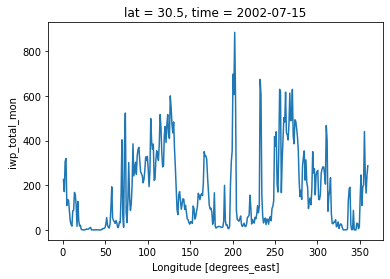

In [163]:
ds.iwp_total_mon[0,120,:].plot()

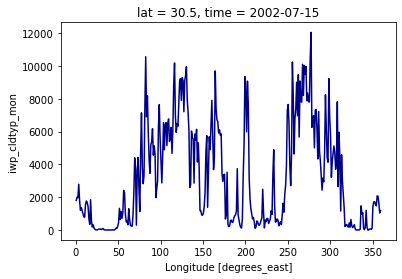

In [185]:
ds.iwp_cldtyp_mon[:,:,0,120,:].sum('opt').sum('press').plot(color='darkblue')

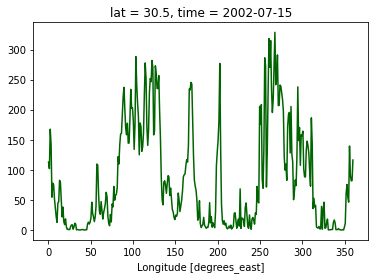

In [189]:
Z=(ds.iwp_cldtyp_mon[:,:,0,120,:]*ds.cldarea_cldtyp_mon[:,:,0,120,:]).sum('opt').sum('press')
(Z/ds.cldarea_total_mon[0,120,:]).plot(color='darkgreen')